## 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load DATA

In [2]:
#Loading dataset
df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 3. Feature Engineering

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

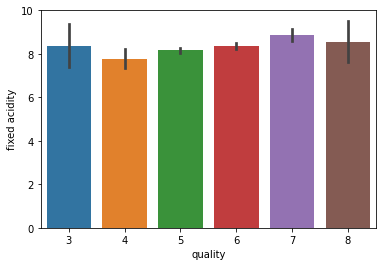

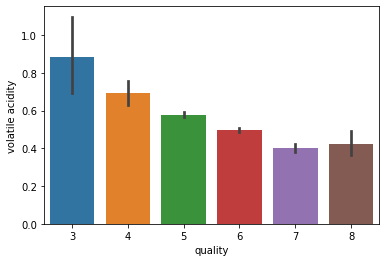

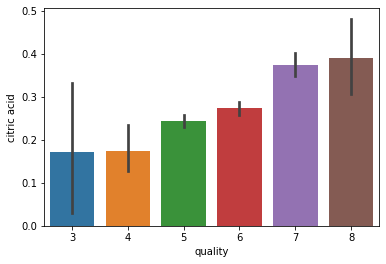

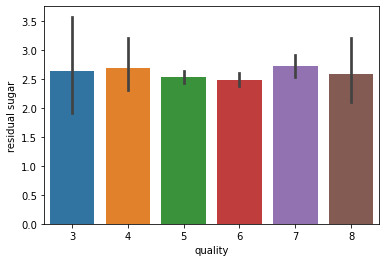

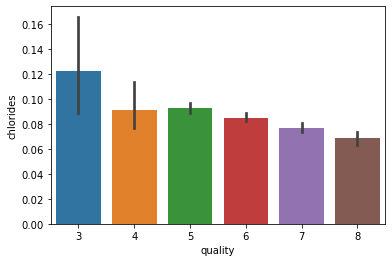

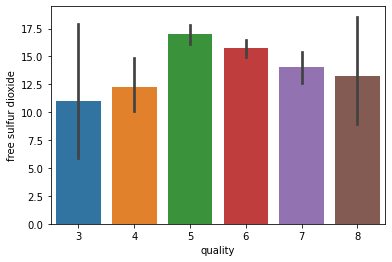

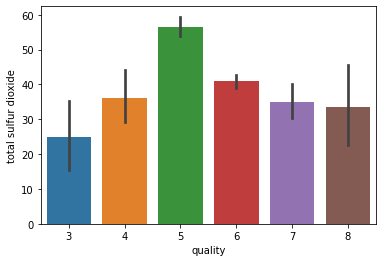

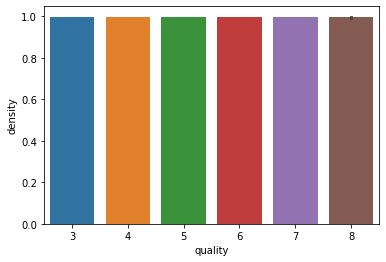

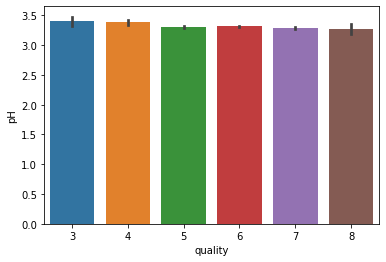

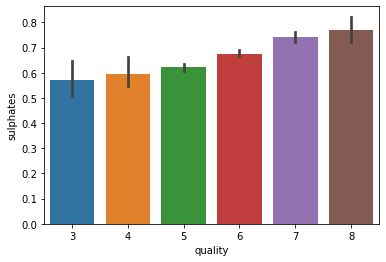

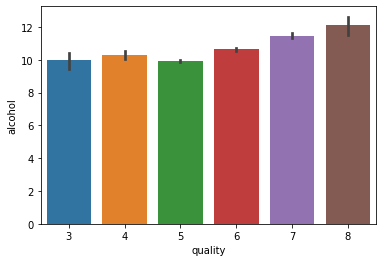

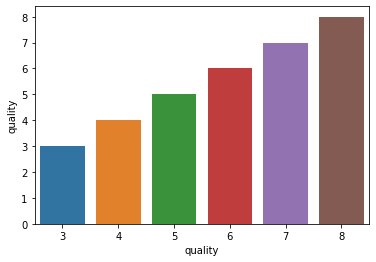

In [5]:
df1 = df.select_dtypes([np.int, np.float])

for i, col in enumerate(df1.columns):
    plt.figure(i)
    sns.barplot(x='quality',y=col, data=df1)

In [6]:
# quality > 6 is good and less is bad
bins = [2, 6.5, 8] 
print(bins)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
print(df['quality'])

[2, 6.5, 8]
0       bad
1       bad
2       bad
3       bad
4       bad
       ... 
1594    bad
1595    bad
1596    bad
1597    bad
1598    bad
Name: quality, Length: 1599, dtype: category
Categories (2, object): [bad < good]


In [7]:
# converting 'bad' and 'good' to labels 0 and 1
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df.quality = encode.fit_transform(df.quality)
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

**Feature Selection**

In [8]:
y_data = df['quality']
x_data = df
x_data.drop(['residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'quality'], axis=1, inplace=True)
#x_data.drop(['quality'], axis=1, inplace=True)

In [9]:
x_data.head()

,fixed acidity,volatile acidity,citric acid,chlorides,sulphates,alcohol
0,7.4,0.70,0.00,0.076,0.56,9.4
1,7.8,0.88,0.00,0.098,0.68,9.8
2,7.8,0.76,0.04,0.092,0.65,9.8
3,11.2,0.28,0.56,0.075,0.58,9.8
4,7.4,0.70,0.00,0.076,0.56,9.4


In [10]:
y_data.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int64

## 4. Trying different Classification Techniques
### a) Linear classifier
### b) Support Vector Machine
### c) Kernel Estimation
### d) Bagging

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)

### a) Linear classifier

### (i) Logistic Regression - Logit is a function through which the binary distribution is associated with the linear equation.

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.875

In [13]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[205,   7],
       [ 23,   5]])

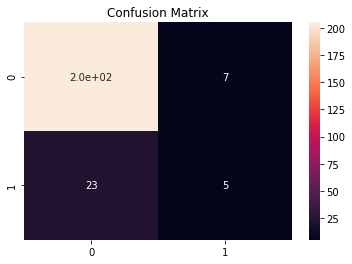

In [14]:
sns.heatmap(cnf_matrix, annot=True)
plt.title("Confusion Matrix")
plt.show()

### (ii) DECISION TREE CLASSIFIER - A decision tree is a map of the possible outcomes of a series of related choices.

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

accuracy_score(y_test, y_pred)

0.8916666666666667

### b) Support Vector Machine - SVM is a supervised machine learning algorithm which can be used for classification or regression problems. It uses a technique called the kernel trick to transform your data and then based on these transformations it finds an optimal boundary between the possible outputs.

In [16]:
from sklearn.svm import SVC

clf = SVC(kernel='linear')
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)

accuracy_score(y_test, y_pred)

0.8833333333333333

### c) Kernel estimation -> k-nearest neighbor - K nearest neighbors is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure. 

In [17]:
from sklearn.neighbors import KNeighborsClassifier
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train,y_train)
yhat = neigh.predict(x_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(x_train)))
print("Test set Accuracy (real acc): ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.9403973509933775
Test set Accuracy (real acc):  0.8958333333333334


### d) Bagging - Bagging (or Bootstrap Aggregating) technique uses these subsets (bags) to get a fair idea of the distribution (complete set).

### (i) Bagging meta-estimator

In [18]:
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
model = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.9

### (ii) Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
model = RandomForestClassifier()
train_x = x_train
train_y = y_train
test_x = x_test
test_y = y_test
# fit the model with the training data
model.fit(train_x,train_y)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

Number of Trees used :  100

Target on train data [0 0 1 ... 0 0 1]

accuracy_score on train dataset :  1.0

Target on test data [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0]

accuracy_score on test dataset :  0.9125


# Conclusion 
## WE tried different technnique for classification and finally saw that Random Forest gives best results from all of them.